# Visualization

In [1]:
from brian2 import *
from brian2modelfitting import *

import numpy as np

WARNING    /home/alteska/anaconda3/envs/brian_opt/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
 [py.warnings]
WARNING    /home/alteska/anaconda3/envs/brian_opt/lib/python3.7/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)
 [py.warnings]


In [2]:
dt = 0.01*ms
defaultclock.dt = dt

## Load the Data

In [3]:
voltage1 = genfromtxt('voltage1nA.csv', delimiter=',')
voltage2 = genfromtxt('voltage2nA.csv', delimiter=',')

In [4]:
inp_cur1 = genfromtxt('inp_cur1nA.csv', delimiter=',')
inp_cur2 = genfromtxt('inp_cur2nA.csv', delimiter=',')
inp_current = [inp_cur1, inp_cur2]
inp_current

[array([ 0.        , -0.01416314,  0.06263459, ..., -0.44478035,
        -0.39163954, -0.33014548]),
 array([ 0.        ,  0.39594954,  0.27878635, ..., -0.55344109,
        -0.71057181, -0.62256885])]

In [5]:
out_spikes1 = genfromtxt('out_spikes1nA.csv', delimiter=',')
out_spikes2 = genfromtxt('out_spikes2nA.csv', delimiter=',')
out_spikes = [out_spikes1, out_spikes2]
# out_spikes

## Define Model

In [19]:

res={'R': 10844772693.230858,
 'a': 0.017599819947209286,
 'alpha': 0.7934076487945085,
 'taut': 0.06804800236847092,
 'tau': 0.013758977268722508}

In [7]:
res={'a': 0.014843819281705209,
 'R': 12785385979.600677,
 'taut': 0.09567911713476439,
 'alpha': 0.47739834334324494,
 'tau': 0.017770555304749146}

In [20]:

model = '''
        dv/dt = (R*I(t)- v)/tau : 1
        dvt/dt = (a*v - vt) / taut :1
        alpha : 1 (constant)
        a : 1 (constant)
        R : 1/amp (constant)
        tau : second (constant)
        taut : second (constant)
        '''

reset = '''
v = 0
vt = vt + alpha
'''

In [21]:
I = TimedArray(inp_cur1*nA, dt=dt)

In [22]:
start_scope()
G = NeuronGroup(1, model,
                threshold='v > 1 + vt',
                reset=reset,
                refractory=2*ms,
                method='exponential_euler')

G.set_states(res, units=False)
mon = StateMonitor(G, 'v', record=0)
spike_mon = SpikeMonitor(G)

In [23]:
run(5*second)

WARNING    "v" is an internal variable of group "neurongroup_1", but also exists in the run namespace with the value array([ 0.00000000e+00,  0.00000000e+00, -1.01870920e-04, ...,
       -3.21206661e+00, -3.20814729e+00, -3.20427497e+00]). The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    "t" is an internal variable of group "neurongroup_1", but also exists in the run namespace with the value array([9.79]). The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


In [24]:
fits = mon.v[0]
spikes = getattr(spike_mon, 't') / ms

In [25]:
t0 = np.arange(0, len(voltage1))*dt/ms
t_ = spikes[0]
t = spikes[0][t_<2000]

In [26]:
v = fits
d = 500000

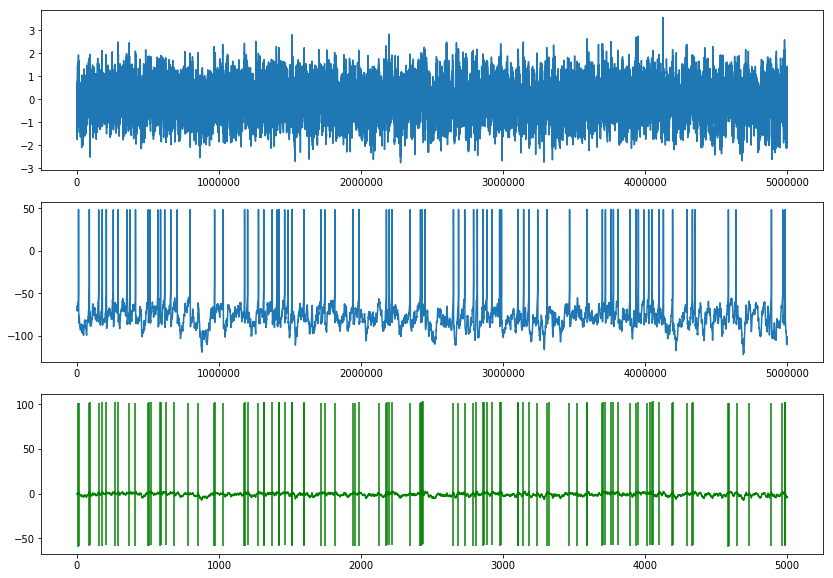

In [27]:
fig, ax = plt.subplots(nrows=3, figsize=(14,10))
ax[0].plot(t0[:d]/ms, inp_cur1[:d]);
ax[1].plot(t0[:d]/ms, voltage1[:d]);
ax[2].plot(np.arange(0, len(v))*dt/ms, v,'g');
ax[2].vlines(spikes, v[np.int_(np.round(spikes/dt*ms))]-60, v[np.int_(np.round(spikes/dt*ms))]+100, 'g');


(0, 2000)

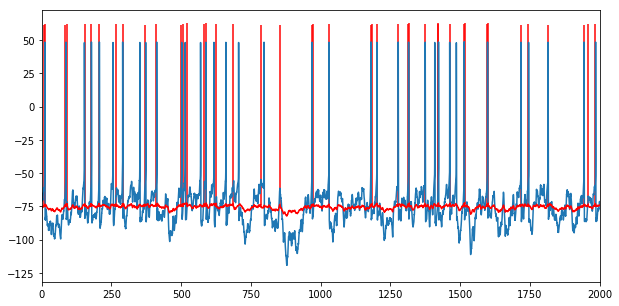

In [28]:
plt.figure(figsize=(10,5))
plot(t0[:d], voltage1[:d]);
plot(np.arange(0, len(v))*dt/ms, v-75,'r');
vlines(spikes, v[np.int_(np.round(spikes/dt*ms))]-75, v[np.int_(np.round(spikes/dt*ms))]+60, 'r');
xlim(0,2000)